In [ ]:
import numpy as np 
import os

path = "path_to_furniture_dataset"
scene_id = "0a9f5311-49e1-414c-ba7b-b42a171459a3_SecondBedroom-18509"
data = os.path.join(path, scene_id, "boxes.npz")

data = np.load(data, allow_pickle=True)
# data = np.load("boxes.npz")
print(data.files)
# print(data)

['uids', 'jids', 'scene_id', 'scene_uid', 'scene_type', 'json_path', 'room_layout', 'floor_plan_vertices', 'floor_plan_faces', 'floor_plan_centroid', 'class_labels', 'translations', 'sizes', 'angles']


In [10]:
class_labels_dining = [
    "armchair", "bookshelf", "cabinet", "ceiling_lamp", 
    "chaise_longue_sofa", "chinese_chair", "coffee_table", 
    "console_table", "corner_side_table", "desk", "dining_chair", 
    "dining_table", "l_shaped_sofa", "lazy_sofa", "lounge_chair", 
    "loveseat_sofa", "multi_seat_sofa", "pendant_lamp", 
    "round_end_table", "shelf", "stool", "tv_stand", 
    "wardrobe", "wine_cabinet", "start", "end"]

class_labels_bedroom = [
    "armchair", "bookshelf", "cabinet", "ceiling_lamp", "chair", 
    "children_cabinet", "coffee_table", "desk", "double_bed", 
    "dressing_chair", "dressing_table", "kids_bed", "nightstand", 
    "pendant_lamp", "shelf", "single_bed", "sofa", "stool", "table", 
    "tv_stand", "wardrobe", "start", "end"]


class_labels_library= ["armchair", "bookshelf", "cabinet", "ceiling_lamp", 
    "chaise_longue_sofa", "chinese_chair", "coffee_table", "console_table", 
    "corner_side_table", "desk", "dining_chair", "dining_table", "dressing_table", 
    "l_shaped_sofa", "lazy_sofa", "lounge_chair", "loveseat_sofa", "multi_seat_sofa",
    "pendant_lamp", "round_end_table", "shelf", "stool", "wardrobe", "wine_cabinet", 
    "start", "end"]


class_labels_livingroom = ["armchair", "bookshelf", "cabinet", "ceiling_lamp", 
    "chaise_longue_sofa", "chinese_chair", "coffee_table", "console_table", 
    "corner_side_table", "desk", "dining_chair", "dining_table", "l_shaped_sofa", 
    "lazy_sofa", "lounge_chair", "loveseat_sofa", "multi_seat_sofa", "pendant_lamp", 
    "round_end_table", "shelf", "stool", "tv_stand", "wardrobe", "wine_cabinet", 
    "start", "end"]

In [25]:
data['class_labels'].shape

(5, 23)

In [29]:
class_labels = data['class_labels']

label_indices = np.argmax(class_labels, axis=1)
mapped_labels = [class_labels_bedroom[idx] for idx in label_indices]

list(zip(label_indices, mapped_labels))

for idx, label in enumerate(mapped_labels):
    position = data['translations'][idx]
    size = data['sizes'][idx]
    rotation = data['angles'][idx]
    print(f"Label: {label}, Position: {position}, Size: {size}, Rotation: {rotation}")

Label: double_bed, Position: [0.41667822 0.501445   0.3627792 ], Size: [0.9459485 0.50141   1.111554 ], Rotation: [-3.1415927]
Label: nightstand, Position: [ 1.4502343  0.275     -0.7855594], Size: [0.200001 0.275    0.161057], Rotation: [-1.5707872]
Label: nightstand, Position: [1.4517455 0.275     1.4780767], Size: [0.200001 0.275    0.161057], Rotation: [-1.5707872]
Label: pendant_lamp, Position: [ 0.06025   2.179707 -0.0043  ], Size: [0.418228 0.420311 0.418203], Rotation: [0.]
Label: bookshelf, Position: [-1.3952496   0.79144233  0.3285    ], Size: [0.7798857  0.76144236 0.15001717], Rotation: [1.5707872]


In [3]:
data['translations']

array([[ 2.085799  ,  0.367     ,  0.58181655],
       [ 1.7433696 ,  0.3694685 , -0.06108513],
       [ 2.4428205 ,  0.3694685 , -0.06108513],
       [ 2.456731  ,  0.3694685 ,  1.2550046 ],
       [ 1.7345281 ,  0.3694685 ,  1.2550046 ],
       [ 0.84299207,  0.7565295 ,  0.50989217],
       [ 2.0977945 ,  2.2605247 ,  0.6056675 ],
       [-0.820795  ,  2.5396326 , -1.60709   ],
       [ 2.097395  ,  2.5396326 , -1.16965   ]], dtype=float32)

In [4]:
data['floor_plan_vertices']

array([[ 0.60821,  0.     , -1.26641],
       [-4.66614,  0.     , -0.4814 ],
       [-4.66614,  0.     , -1.26641],
       [-4.66614,  0.     , -0.4814 ],
       [ 0.60821,  0.     , -1.26641],
       [-3.60558,  0.     , -0.4814 ],
       [-3.60558,  0.     , -0.4814 ],
       [ 0.60821,  0.     , -1.26641],
       [-0.64085,  0.     , -0.4814 ],
       [-0.64085,  0.     , -0.4814 ],
       [ 0.60821,  0.     , -1.26641],
       [-0.64085,  0.     ,  2.67175],
       [-0.64085,  0.     ,  2.67175],
       [ 0.60821,  0.     , -1.26641],
       [ 2.08901,  0.     ,  2.67175],
       [ 2.08901,  0.     ,  2.67175],
       [ 0.60821,  0.     , -1.26641],
       [ 2.08901,  0.     , -1.26641]])

In [5]:
data['floor_plan_faces']

array([[ 0,  2,  1],
       [ 3,  5,  4],
       [ 6,  8,  7],
       [ 9, 11, 10],
       [12, 14, 13],
       [15, 17, 16]])

In [6]:
import pandas as pd

room_layout = data['room_layout']
room_layout_array = room_layout.squeeze()

height, width = room_layout_array.shape
coordinates = [(x, y, room_layout_array[y, x]) for y in range(height) for x in range(width)]
df = pd.DataFrame(coordinates, columns=["X", "Y", "Pixel Value"])

csv_path = "room_layout_pixels.csv"
df.to_csv(csv_path, index=False)


In [7]:
white_region_coords = [(x, y, room_layout_array[y, x]) for y in range(height) for x in range(width) if room_layout_array[y, x] == 255]

df_white_regions = pd.DataFrame(white_region_coords, columns=["X", "Y", "Pixel Value"])

csv_white_path = "white_region_pixels.csv"
df_white_regions.to_csv(csv_white_path, index=False)


In [8]:
room_layout = data.get("room_layout")
floor_plan_vertices = data.get("floor_plan_vertices")
floor_plan_faces = data.get("floor_plan_faces")
floor_plan_centroid = data.get("floor_plan_centroid")

layout_info = {
    "room_layout_shape": room_layout.shape if room_layout is not None else None,
    "floor_plan_vertices_shape": floor_plan_vertices.shape if floor_plan_vertices is not None else None,
    "floor_plan_faces_shape": floor_plan_faces.shape if floor_plan_faces is not None else None,
}

layout_info


{'room_layout_shape': (256, 256, 1),
 'floor_plan_vertices_shape': (18, 3),
 'floor_plan_faces_shape': (6, 3)}

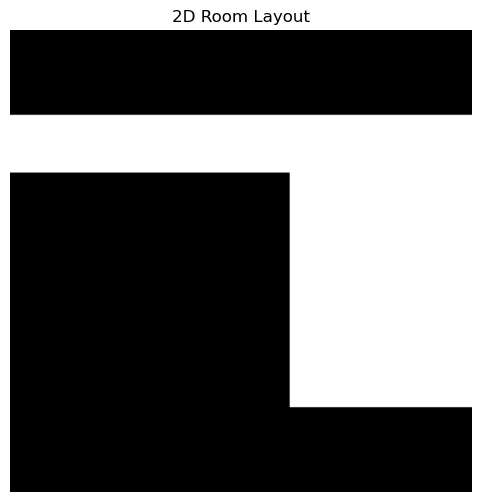

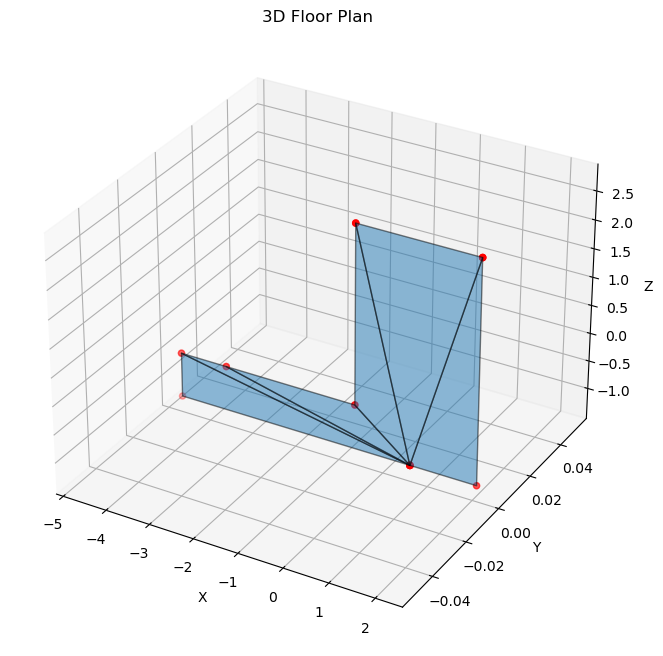

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.figure(figsize=(6, 6))
# plt.imshow(room_layout.squeeze(), cmap="gray")
plt.imshow(room_layout[:, :, 0], cmap="gray")
plt.title("2D Room Layout")
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(floor_plan_vertices[:, 0], floor_plan_vertices[:, 1], floor_plan_vertices[:, 2], c='r', marker='o')

faces = [floor_plan_vertices[f] for f in floor_plan_faces]
poly_collection = Poly3DCollection(faces, alpha=0.5, edgecolor='k')
ax.add_collection3d(poly_collection)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Floor Plan")

plt.show()


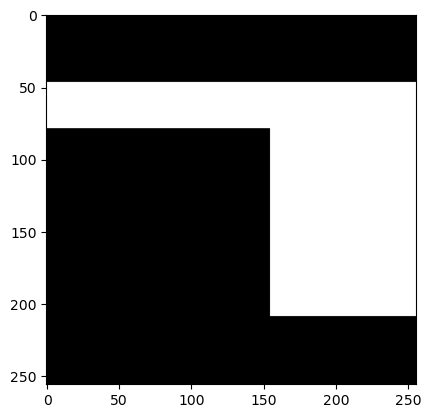

In [10]:
from PIL import Image

img = "1.png"
def room_mask_rotated(img, angle=0):
    im = Image.open(img).convert("RGB")
    im = im.rotate(angle * 180 / np.pi, resample=Image.BICUBIC)
    return np.asarray(im).astype(np.float32) / np.float32(255)

a = room_mask_rotated(img)
plt.imshow(a, cmap="gray", origin="upper")

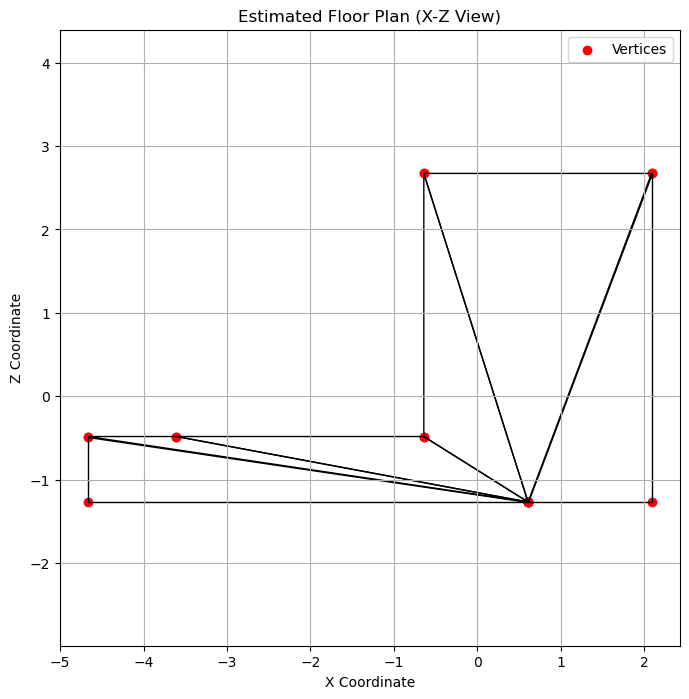

34.88741313919942 2.67175 -4.66614


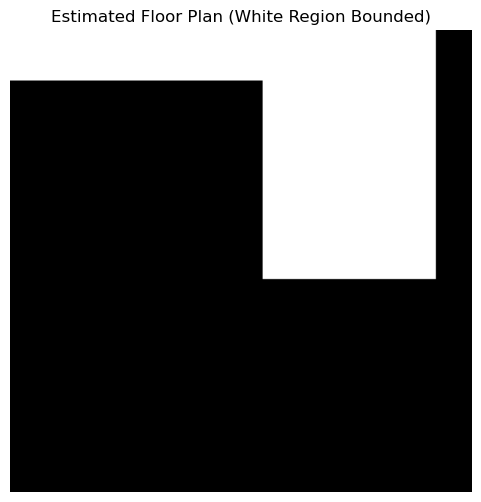

In [11]:
import numpy as np
import cv2

vertices = data["floor_plan_vertices"]
faces = data["floor_plan_faces"]

x_z_vertices = vertices[:, [0, 2]]

plt.figure(figsize=(8, 8))
for face in faces:
    polygon = x_z_vertices[face]
    plt.fill(polygon[:, 0], polygon[:, 1], edgecolor='black', fill=False)

plt.scatter(x_z_vertices[:, 0], x_z_vertices[:, 1], color='red', label="Vertices")
plt.xlabel("X Coordinate")
plt.ylabel("Z Coordinate")
plt.title("Estimated Floor Plan (X-Z View)")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


img_size = 256
scale_factor = img_size / (np.max(x_z_vertices) - np.min(x_z_vertices))
print(scale_factor, np.max(x_z_vertices), np.min(x_z_vertices))
x_min, z_min = np.min(x_z_vertices, axis=0)
x_max, z_max = np.max(x_z_vertices, axis=0)

def transform_to_image_coords(coords, img_size, x_min, z_min, scale_factor):
    transformed = (coords - [x_min, z_min]) * scale_factor
    transformed = transformed.astype(int)
    return transformed

floor_plan_img = np.zeros((img_size, img_size), dtype=np.uint8)

for face in faces:
    polygon = transform_to_image_coords(x_z_vertices[face], img_size, x_min, z_min, scale_factor)
    cv2.fillPoly(floor_plan_img, [polygon], 255)

plt.figure(figsize=(6, 6))
plt.imshow(floor_plan_img, cmap='gray', origin='upper')
plt.title("Estimated Floor Plan (White Region Bounded)")
plt.axis("off")
plt.show()


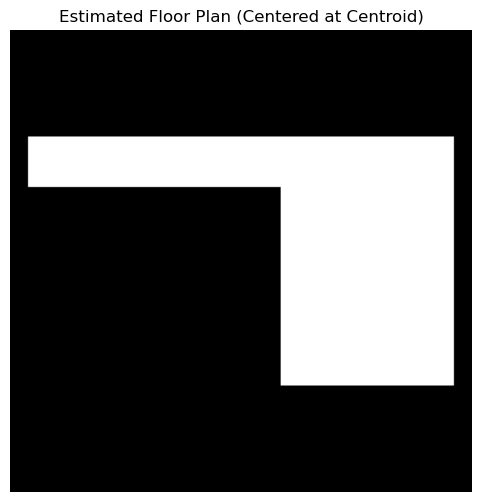

In [12]:
centroid = data["floor_plan_centroid"][[0, 2]]

def transform_to_image_coords_centered(coords, img_size, centroid, scale_factor):
    transformed = (coords - centroid) * scale_factor + img_size // 2
    transformed = transformed.astype(int)
    return transformed

floor_plan_img_centered = np.zeros((img_size, img_size), dtype=np.uint8)

for face in faces:
    polygon = transform_to_image_coords_centered(x_z_vertices[face], img_size, centroid, scale_factor)
    cv2.fillPoly(floor_plan_img_centered, [polygon], 255)

plt.figure(figsize=(6, 6))
plt.imshow(floor_plan_img_centered, cmap='gray', origin='upper')
plt.title("Estimated Floor Plan (Centered at Centroid)")
plt.axis("off")
plt.show()

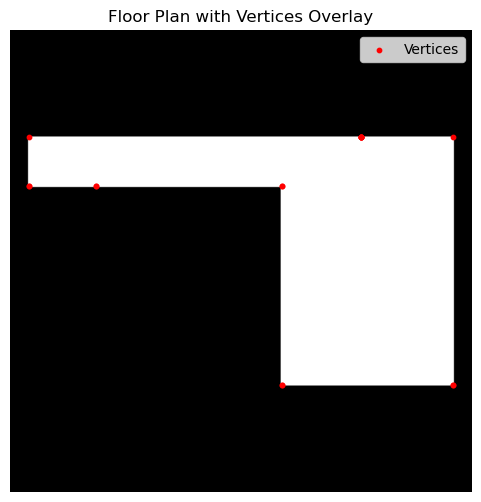

In [13]:
transformed_vertices = transform_to_image_coords_centered(x_z_vertices, img_size, centroid, scale_factor)

plt.figure(figsize=(6, 6))
plt.imshow(floor_plan_img_centered, cmap='gray', origin='upper')
plt.scatter(transformed_vertices[:, 0], transformed_vertices[:, 1], color='red', s=10, label="Vertices")
plt.title("Floor Plan with Vertices Overlay")
plt.axis("off")
plt.legend()
plt.show()


In [14]:
vertex_pixel_mapping = {
    tuple(x_z_vertices[i]): tuple(transformed_vertices[i]) for i in range(len(x_z_vertices))
}

df_mapping = pd.DataFrame([
    {"Vertex (X, Z)": key, "Pixel (Row, Col)": value} for key, value in vertex_pixel_mapping.items()
])

print(df_mapping)

          Vertex (X, Z) Pixel (Row, Col)
0   (0.60821, -1.26641)        (194, 59)
1   (-4.66614, -0.4814)         (10, 86)
2  (-4.66614, -1.26641)         (10, 59)
3   (-3.60558, -0.4814)         (47, 86)
4   (-0.64085, -0.4814)        (150, 86)
5   (-0.64085, 2.67175)       (150, 196)
6    (2.08901, 2.67175)       (245, 196)
7   (2.08901, -1.26641)        (245, 59)


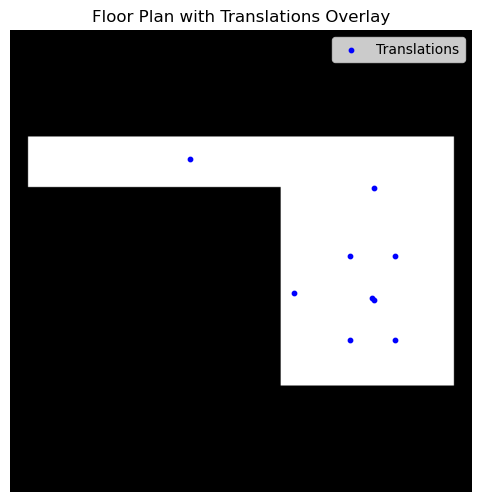

In [15]:
translations_xz = data["translations"][:, [0, 2]] + data["floor_plan_centroid"][[0, 2]]

# Transform translation points to image coordinates centered around the centroid
transformed_translations = transform_to_image_coords_centered(translations_xz, img_size, centroid, scale_factor)

plt.figure(figsize=(6, 6))
plt.imshow(floor_plan_img_centered, cmap='gray', origin='upper')
plt.scatter(transformed_translations[:, 0], transformed_translations[:, 1], color='blue', s=10, label="Translations")
plt.title("Floor Plan with Translations Overlay")
plt.axis("off")
plt.legend()
plt.show()


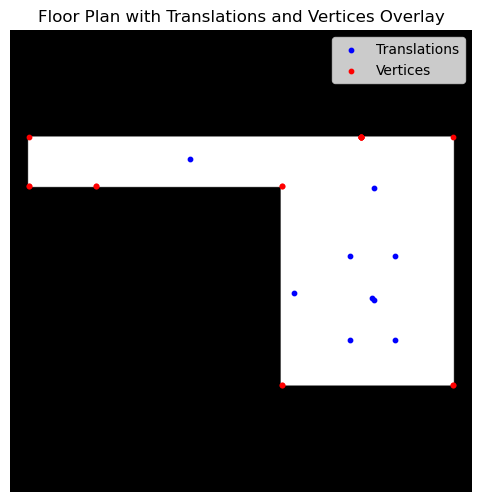

In [16]:
translation_pixel_mapping = {
    tuple(translations_xz[i]): tuple(transformed_translations[i]) for i in range(len(translations_xz))
}

df_translation_mapping = pd.DataFrame([
    {"Translation (X, Z)": key, "Pixel (Row, Col)": value} for key, value in translation_pixel_mapping.items()
])

plt.figure(figsize=(6, 6))
plt.imshow(floor_plan_img_centered, cmap='gray', origin='upper')
plt.scatter(transformed_translations[:, 0], transformed_translations[:, 1], color='blue', s=10, label="Translations")
plt.scatter(transformed_vertices[:, 0], transformed_vertices[:, 1], color='red', s=10, label="Vertices")
plt.title("Floor Plan with Translations and Vertices Overlay")
plt.axis("off")
plt.legend()
plt.show()
